# BikeWale anlysis of bikes 

In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import re
import requests
import warnings


brandname =[]
bikename = []
cc = []
kmpl =[]
rating =[]
noofratings = []
bhp=[]
weight =[]
ex_price =[]

base_url = 'https://www.bikewale.com/'
response =requests.get(base_url)
#generating html format for bs4
soup = BeautifulSoup(response.text,'html.parser')
brands = soup.find_all('div',class_='o-jr o-j1 o-jK o-ei')
for i in brands: 
  brand_name = i.text
  urls =soup.find('a',title=brand_name)
  url_page = urls['href']
  #print(url_page)
  bikewale_page = f'https://www.bikewale.com{url_page}'
  response_page =requests.get(bikewale_page)
  #print(response_page)
  soup_page = BeautifulSoup(response_page.text,'html.parser')
  bike_details = soup_page.find_all('div',class_='o-C o-cF o-c9 o-bT o-cp o-f')
  for j in bike_details:      
      #print(j.text)
      if re.findall(r'(Upcoming).+',j.text):
          #print("Bike is Not launched yet")
          bike_name = j.find('img')['alt']  # getting bike name 
          if bike_name:
             bikename.append(bike_name)  
          else:
             bikename.append(np.nan) 
          cc.append(np.nan)
          kmpl.append(np.nan)
          bhp.append(np.nan)
          weight.append(np.nan)
          ex_price.append(np.nan)
          rating.append(np.nan)
          noofratings.append(np.nan)
          #print(brand_name)
          if brand_name:
           brandname.append(brand_name)
          else:
           brandname.append(np.nan)
          #print('**'*5)         
      else:
          bike_name = j.find('img')['alt']  # getting bike name 
          if bike_name:
             bikename.append(bike_name)  
          else:
             bikename.append(np.nan) 
          pattern = f"{re.escape(bike_name)}(.+?)cc"
          cc_ = re.findall(pattern,j.text)  # getting cc of the bike 
          if cc_:
             cc.append(cc_[0])  
          else:
             cc.append(np.nan)
          kmpl_ = re.findall(r'(\d+)\skmpl',j.text) # getting kmpl for the bike 
          if kmpl_:
             kmpl.append(kmpl_[0])  
          else:
             kmpl.append(np.nan)
          bhp_ = re.findall(r'kmpl\|(\d.+)\sbhp',j.text)  # getting bhp of the bike 
          if bhp_:
             bhp.append(bhp_[0])  
          else:
             bhp.append(np.nan)
          weight_ = re.findall(r'bhp\|(\d.+)\skg',j.text) # getting kerb weight of the bike
          if weight_:
             weight.append(weight_[0])  
          else:
             weight.append(np.nan)
          ex_price_ = re.findall(r'₹\s(\d.+)Avg',j.text) # to get the exshowroom price 
          if ex_price_:
             ex_price.append(ex_price_[0])  
          else:
             ex_price.append(np.nan)
          rating_ = re.findall(r'(\d.+)\/5',j.text)  # rating by users in bikewale
          if rating_:
             rating.append(rating_[0])  
          else:
             rating.append(np.nan)
          noof_ratings =  re.findall(r'\/5(.+)\sRatings',j.text)
          if noof_ratings:
             noofratings.append(noof_ratings[0])  
          else:
             noofratings.append(np.nan)
          #print(brand_name)
          if brand_name:
            brandname.append(brand_name)
          else:
            brandname.append(np.nan)
          # print(cc_)
          # print(kmpl)
          # print(bhp)
          # print(weight)
          # print(ex_price)
          # print(rating)
          # print(noof_ratings)
  df = pd.DataFrame({"Brand":brandname,"Bike_Name":bikename,"CC":cc,"KMPL":kmpl,"BHP":bhp,"KerbWeight":weight,"ExShowroomPrice":ex_price,"Rating":rating,"Noofratings":noofratings})
  df.to_csv('bikewale.csv')    


In [2]:
from matplotlib.backends.backend_pdf import PdfPages 
import matplotlib.pyplot as plt
import seaborn as sns


In [121]:
df.head()

,Brand,Bike_Name,CC,KMPL,BHP,KerbWeight,ExShowroomPrice,Rating,Noofratings
0,Royal Enfield,Royal Enfield Hunter 350,349.34,35,20.2,177,"1,49,900",4.8,87
1,Royal Enfield,Royal Enfield Classic 350,349,34,20.2,195,"1,95,300",4.7,622
2,Royal Enfield,Royal Enfield Continental GT 650,648,5,47,211,"3,18,796",4.8,1083
3,Royal Enfield,Royal Enfield Bullet 350,349,5,20.2,195,"1,74,875",4.7,907
4,Royal Enfield,Royal Enfield Meteor 350,349.34,33,19.94,191,"2,08,191",4.6,830


In [4]:
#Convert Rating to float
# Load your data
# Clean and preprocess
df = pd.read_csv("bikewale.csv")
df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")
df["ExShowroomPrice"] = df["ExShowroomPrice"].str.replace(",", "", regex=False).astype(float)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       491 non-null    int64  
 1   Brand            491 non-null    object 
 2   Bike_Name        491 non-null    object 
 3   CC               315 non-null    float64
 4   KMPL             176 non-null    float64
 5   BHP              171 non-null    float64
 6   KerbWeight       303 non-null    float64
 7   ExShowroomPrice  417 non-null    float64
 8   Rating           309 non-null    float64
 9   Noofratings      388 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 38.5+ KB


In [6]:
# Show summary statistics
print(df.describe())

       Unnamed: 0           CC        KMPL         BHP  KerbWeight  \
count  491.000000   315.000000  176.000000  171.000000  303.000000   
mean   245.000000   521.125619   35.744318   32.281287  177.182508   
std    141.883755   459.403369   17.715448   40.870600   55.070110   
min      0.000000    49.900000    5.000000    4.300000   45.000000   
25%    122.500000   155.000000   27.750000   10.720000  138.000000   
50%    245.000000   348.360000   35.000000   20.110000  177.000000   
75%    367.500000   803.000000   48.000000   36.280000  207.000000   
max    490.000000  2458.000000   90.000000  215.000000  427.000000   

       ExShowroomPrice      Rating  Noofratings  
count     4.170000e+02  309.000000   388.000000  
mean      6.192996e+05    4.395793   261.185567  
std       9.054670e+05    0.480951   600.940010  
min       3.999900e+04    2.300000     1.000000  
25%       1.049990e+05    4.300000     6.750000  
50%       1.953000e+05    4.500000    35.500000  
75%       7.990320e

In [7]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [8]:
print(df.describe())

                CC        KMPL         BHP  KerbWeight  ExShowroomPrice  \
count   315.000000  176.000000  171.000000  303.000000     4.170000e+02   
mean    521.125619   35.744318   32.281287  177.182508     6.192996e+05   
std     459.403369   17.715448   40.870600   55.070110     9.054670e+05   
min      49.900000    5.000000    4.300000   45.000000     3.999900e+04   
25%     155.000000   27.750000   10.720000  138.000000     1.049990e+05   
50%     348.360000   35.000000   20.110000  177.000000     1.953000e+05   
75%     803.000000   48.000000   36.280000  207.000000     7.990320e+05   
max    2458.000000   90.000000  215.000000  427.000000     6.999000e+06   

           Rating  Noofratings  
count  309.000000   388.000000  
mean     4.395793   261.185567  
std      0.480951   600.940010  
min      2.300000     1.000000  
25%      4.300000     6.750000  
50%      4.500000    35.500000  
75%      4.700000   219.250000  
max      4.900000  4228.000000  


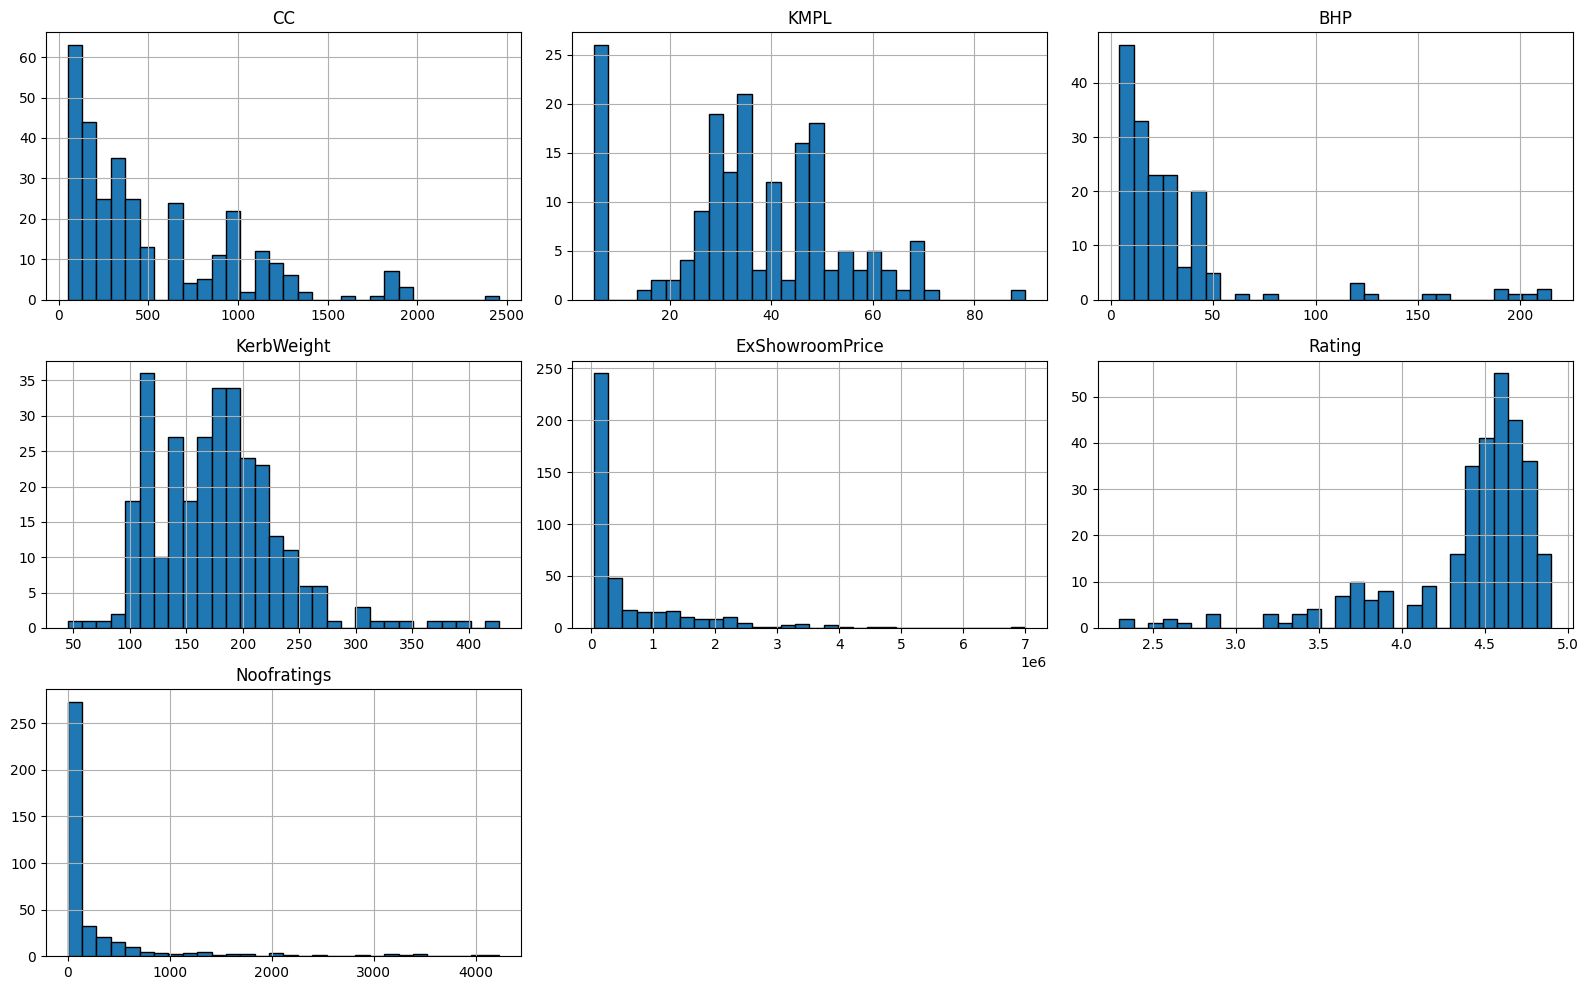

In [9]:
# Plot distributions
numeric_cols = ['CC', 'KMPL', 'BHP', 'KerbWeight', 'ExShowroomPrice', 'Rating', 'Noofratings']
df[numeric_cols].hist(figsize=(16, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

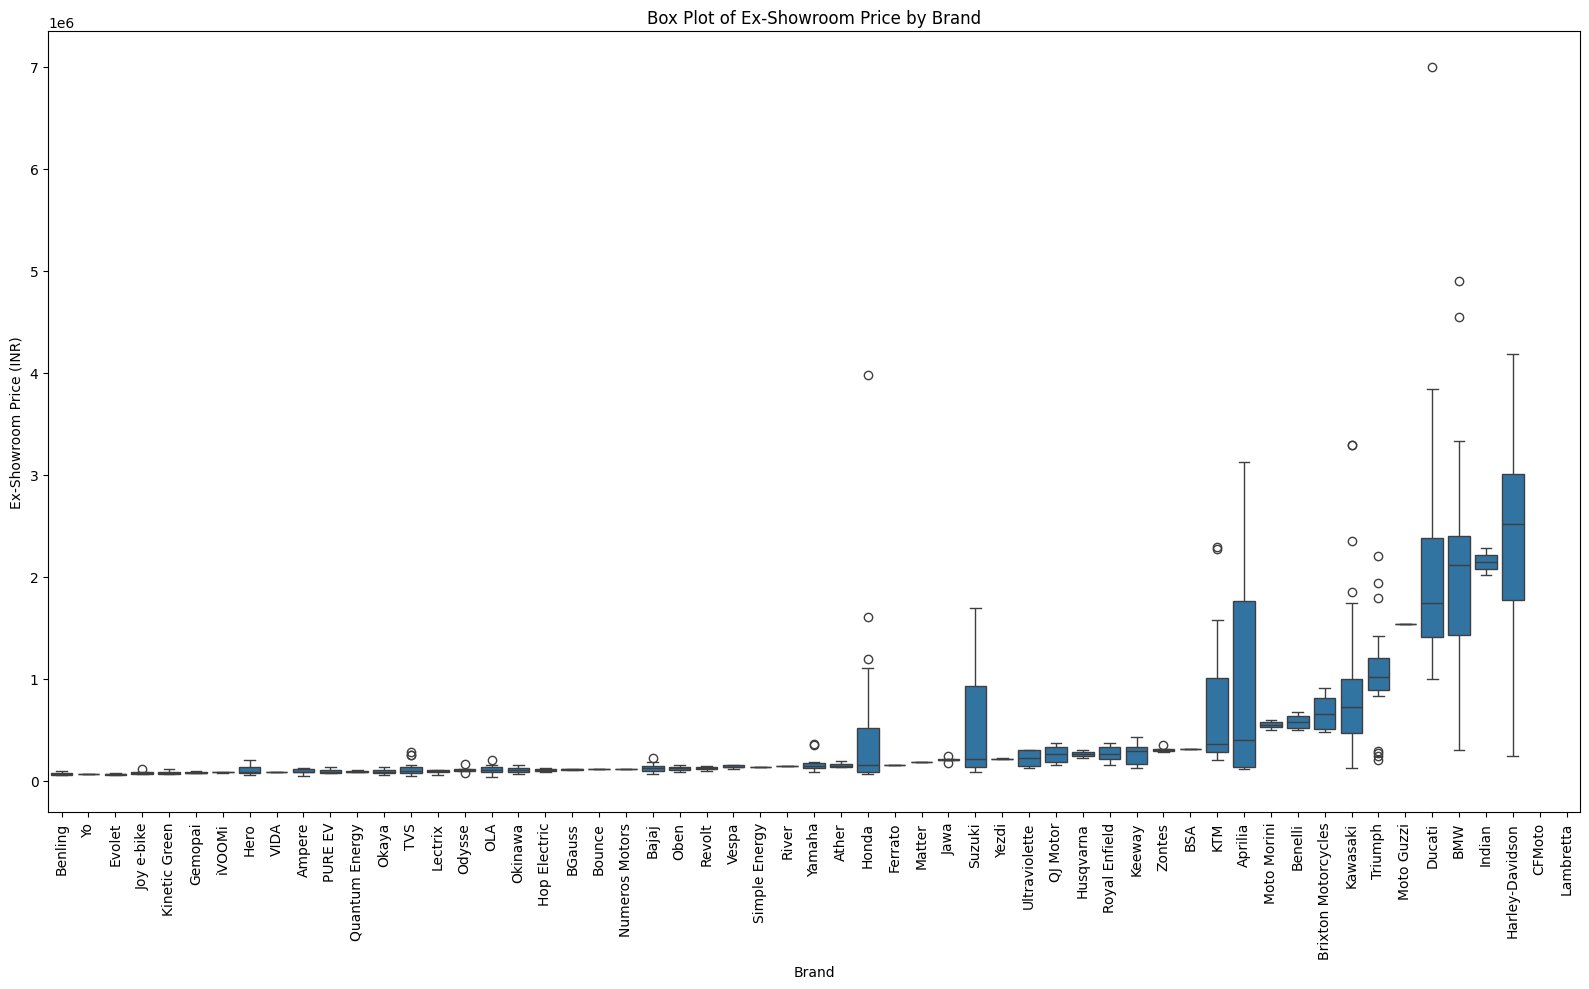

In [10]:
# Create box plot of price by brand
plt.figure(figsize=(16, 10))
order = df.groupby('Brand')['ExShowroomPrice'].median().sort_values().index  # sort brands by median price

sns.boxplot(data=df, x='Brand', y='ExShowroomPrice', order=order)
plt.xticks(rotation=90)
plt.title("Box Plot of Ex-Showroom Price by Brand")
plt.xlabel("Brand")
plt.ylabel("Ex-Showroom Price (INR)")
plt.tight_layout()
plt.show()

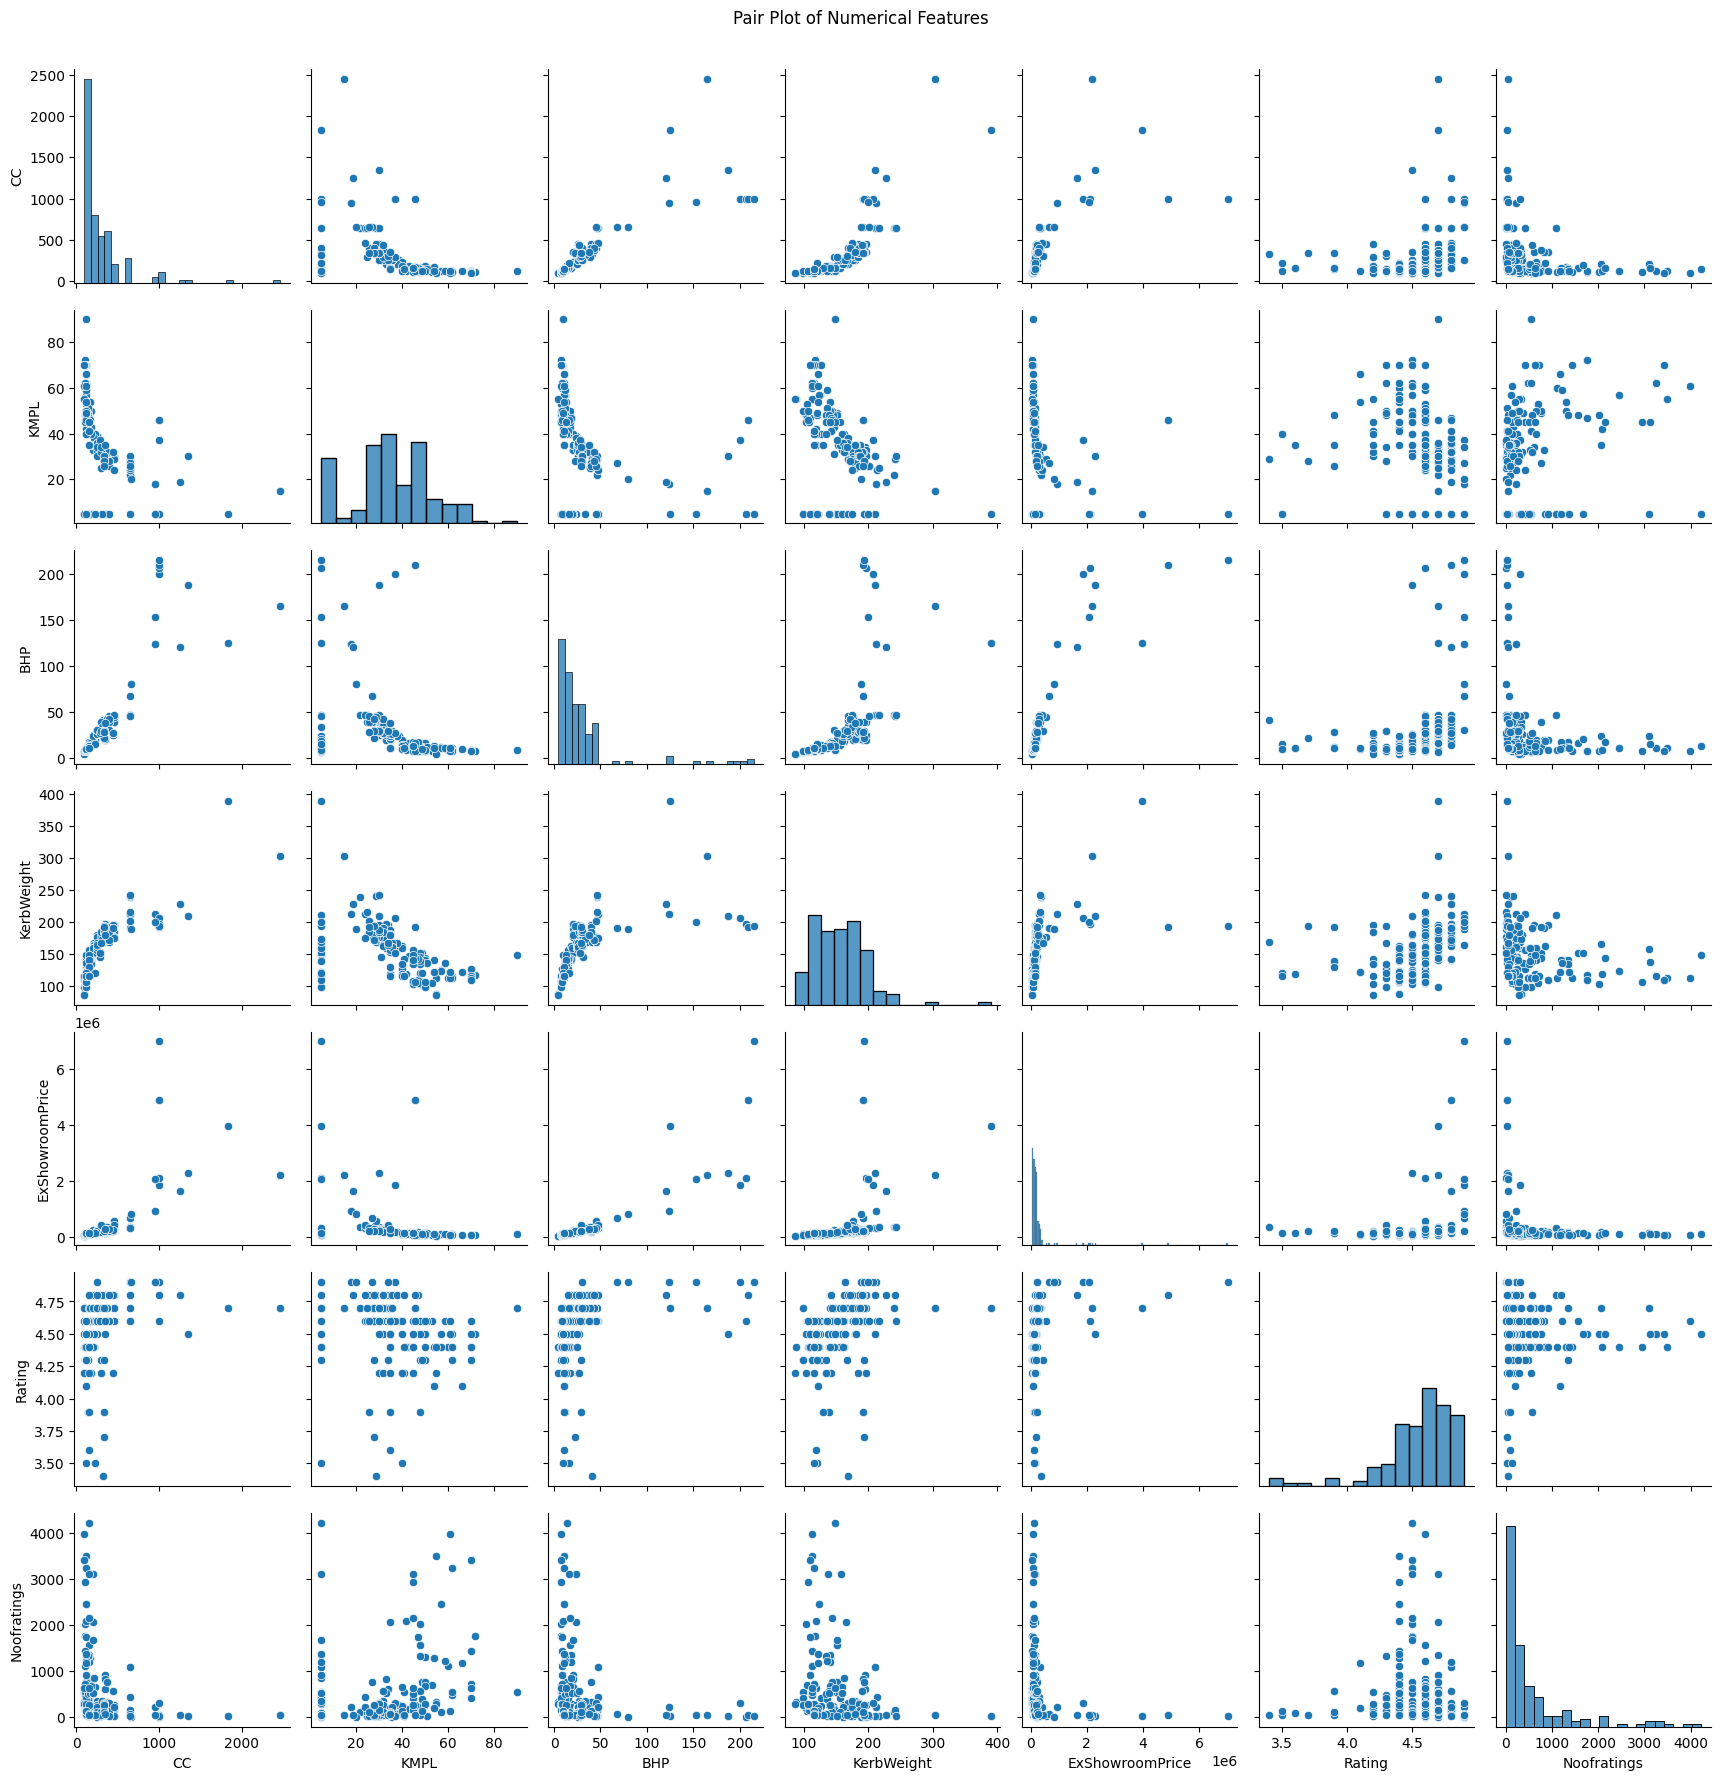

In [11]:
#Plot relationships between key numerical features
sns.pairplot(df[numeric_cols].dropna())
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()

C:\Users\LAKSHMI KONDETI\AppData\Local\Temp\ipykernel_29332\466594996.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_ratings.index, y=brand_ratings.values, palette='viridis')


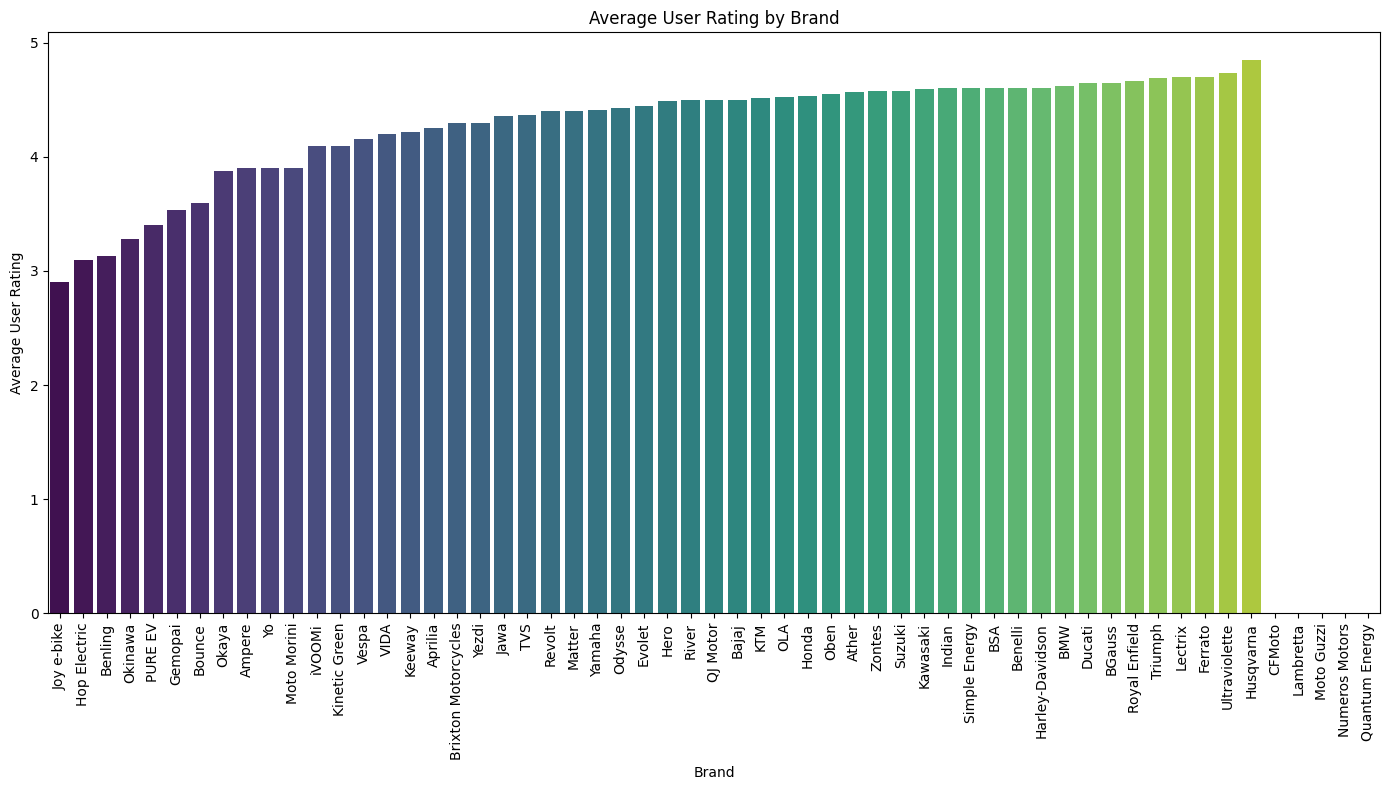

In [12]:
# Clean rating and price columns
df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")
#df["ExShowroomPrice"] = df["ExShowroomPrice"].str.replace(",", "", regex=False).astype(float)

# Group by Brand
brand_ratings = df.groupby('Brand')['Rating'].mean().sort_values()

plt.figure(figsize=(14, 8))
sns.barplot(x=brand_ratings.index, y=brand_ratings.values, palette='viridis')
plt.xticks(rotation=90)
plt.ylabel("Average User Rating")
plt.title("Average User Rating by Brand")
plt.tight_layout()
plt.show()

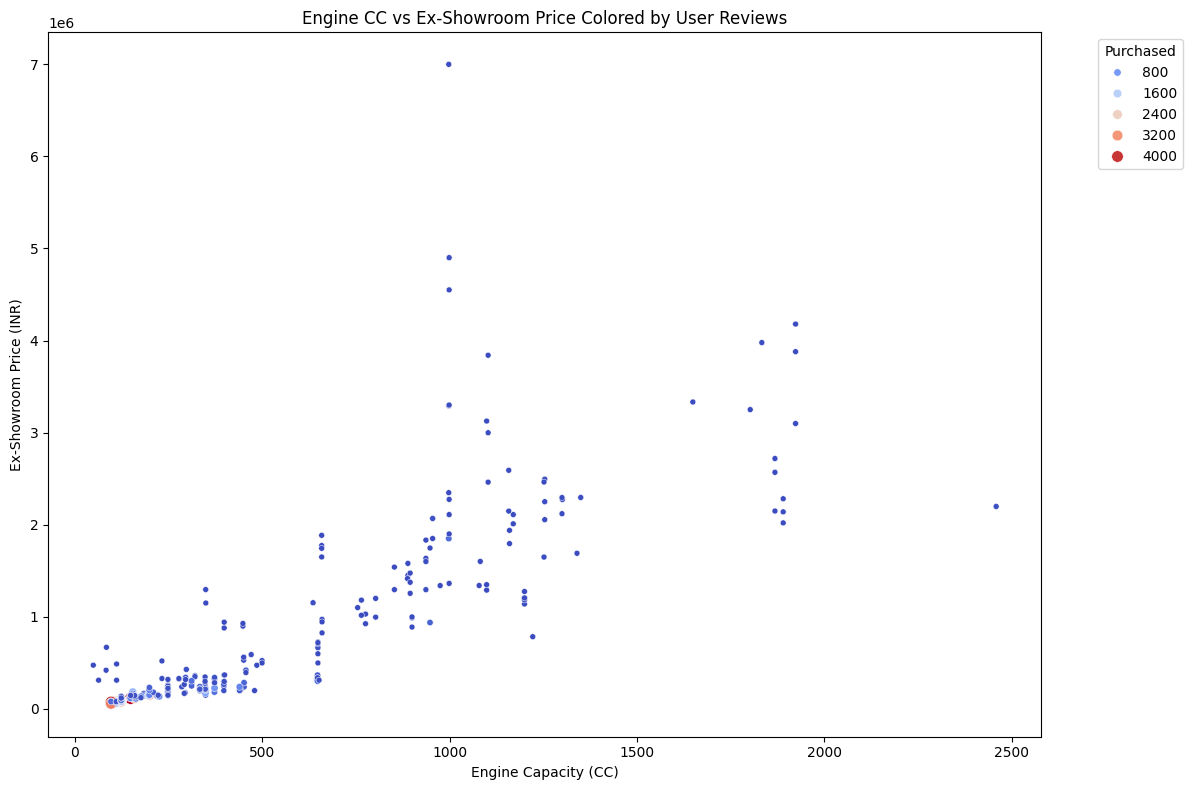

In [13]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='CC', y='ExShowroomPrice', hue='Noofratings', palette='coolwarm', size='Noofratings')
plt.title("Engine CC vs Ex-Showroom Price Colored by User Reviews")
plt.xlabel("Engine Capacity (CC)")
plt.ylabel("Ex-Showroom Price (INR)")
plt.legend(title="Purchased", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

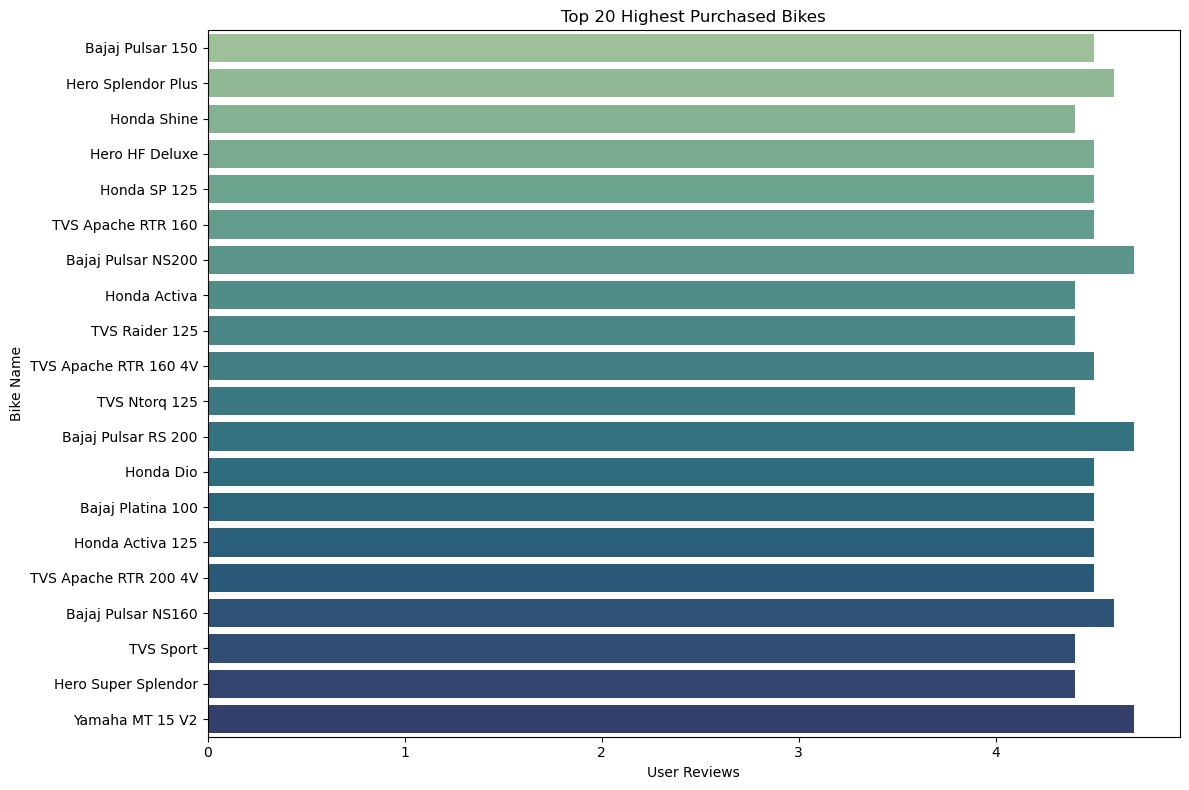

In [150]:
# Sort by highest Reviews (only bikes with at least some rating)
top_rated = df.dropna(subset=["Noofratings"]).sort_values(by='Noofratings', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(y=top_rated['Bike_Name'], x=top_rated['Rating'], palette="crest")
plt.title("Top 20 Highest Purchased Bikes")
plt.xlabel("User Reviews")
plt.ylabel("Bike Name")
plt.tight_layout()
plt.show()

In [146]:
# to print top 10 brands depends on bikewale top rating.
brand_pref = df.groupby('Brand').agg({
    'Rating': 'mean',
    'Noofratings': 'sum'
}).sort_values(by=['Noofratings','Rating'], ascending=False)

print(brand_pref.head(10))  # Top 10 brands

                 Rating  Noofratings
Brand                               
Bajaj          4.500000      21602.0
Honda          4.533333      18760.0
TVS            4.366667      18505.0
Hero           4.487500      15152.0
Yamaha         4.408333       6629.0
Royal Enfield  4.664286       4703.0
Suzuki         4.581818       2893.0
KTM            4.514286       1663.0
OLA            4.527273       1608.0
Kawasaki       4.592857        984.0


In [144]:
#users prefered bikes mostly from reviews by bikewale 
preferred_bikes = df[df['Noofratings'] > 10]  # Filter out low-engagement bikes
preferred_bikes = preferred_bikes.sort_values(by=['Noofratings','Rating'], ascending=False)

print(preferred_bikes[['Brand', 'Bike_Name', 'Noofratings','Rating']].head(10))

     Brand              Bike_Name  Noofratings  Rating
27   Bajaj       Bajaj Pulsar 150       4228.0     4.5
132   Hero     Hero Splendor Plus       3973.0     4.6
48   Honda            Honda Shine       3494.0     4.4
137   Hero         Hero HF Deluxe       3420.0     4.5
46   Honda           Honda SP 125       3244.0     4.5
84     TVS     TVS Apache RTR 160       3109.0     4.5
23   Bajaj     Bajaj Pulsar NS200       3106.0     4.7
47   Honda           Honda Activa       2939.0     4.4
85     TVS         TVS Raider 125       2457.0     4.4
89     TVS  TVS Apache RTR 160 4V       2155.0     4.5


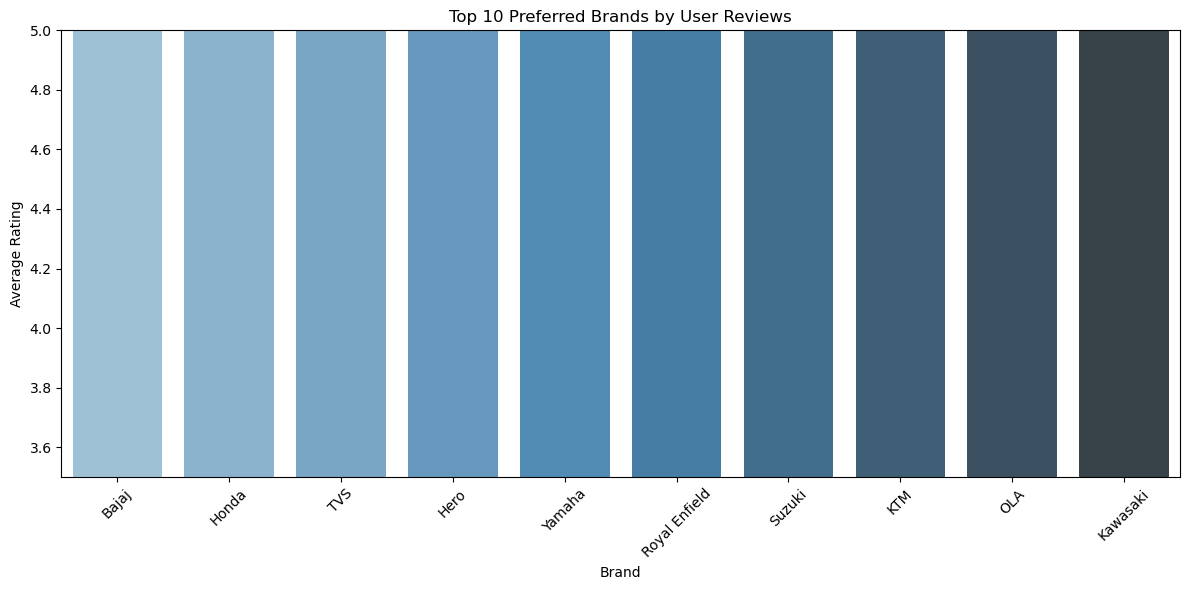

In [153]:
top_brands = brand_pref.head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_brands, x='Brand', y='Noofratings', palette='Blues_d')
plt.title("Top 10 Preferred Brands by User Reviews")
plt.ylim(3.5, 5)
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

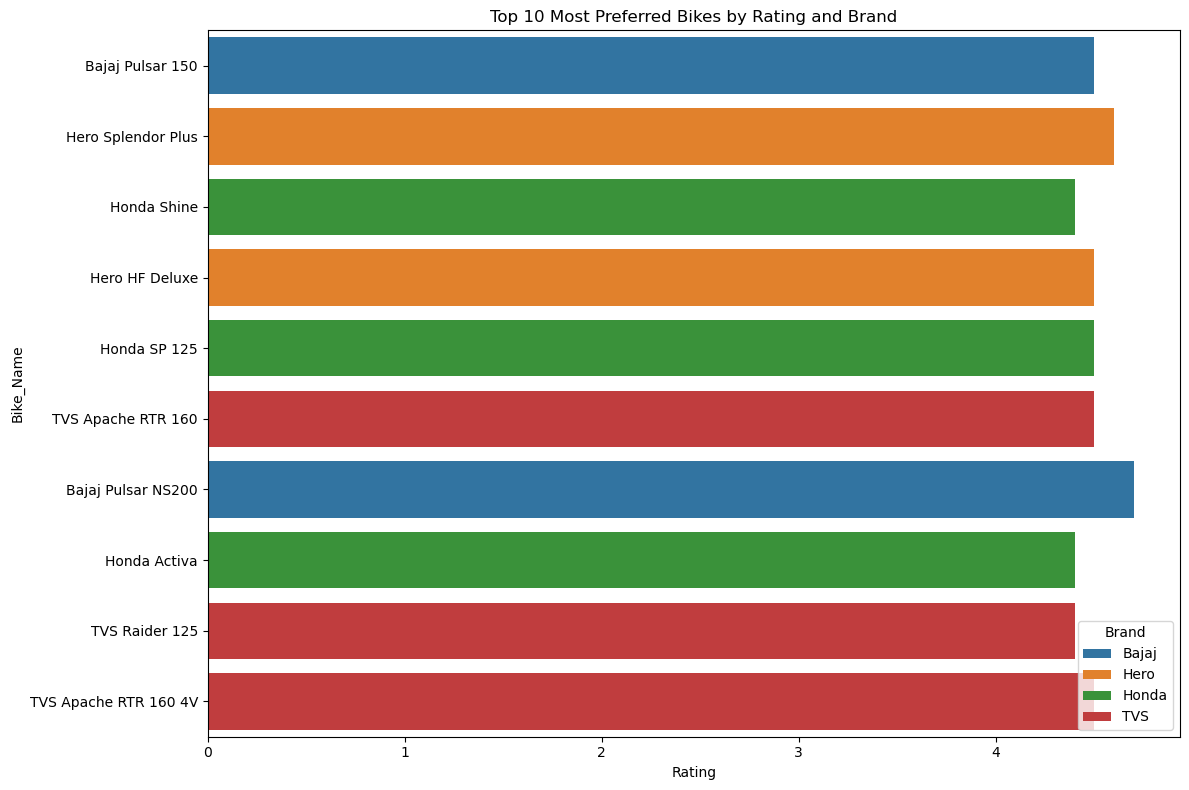

In [148]:
plt.figure(figsize=(12, 8))
sns.barplot(data=preferred_bikes.head(10), y='Bike_Name', x='Rating', hue='Brand', dodge=False)
plt.title("Top 10 Most Preferred Bikes by Rating and Brand")
plt.xlabel("Rating")
plt.tight_layout()
plt.show()

In [156]:
# Create PDF
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages("Bike_Preference_Analysis_Report.pdf") as pdf:
  plt.figure(figsize=(14, 8))
  sns.barplot(x=brand_ratings.index, y=brand_ratings.values, palette='viridis')
  plt.xticks(rotation=90)
  plt.ylabel("Average User Rating")
  plt.title("Average User Rating by Brand")
  plt.tight_layout()
  pdf.savefig()
  plt.close()
    
  plt.figure(figsize=(12, 8))
  sns.scatterplot(data=df, x='CC', y='ExShowroomPrice', hue='Noofratings', palette='coolwarm', size='Noofratings')
  plt.title("Engine CC vs Ex-Showroom Price Colored by User Reviews")
  plt.xlabel("Engine Capacity (CC)")
  plt.ylabel("Ex-Showroom Price (INR)")
  plt.legend(title="Purchased", bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.tight_layout()
  pdf.savefig()
  plt.close()

  top_rated = df.dropna(subset=["Noofratings"]).sort_values(by='Noofratings', ascending=False).head(20)
  plt.figure(figsize=(12, 8))
  sns.barplot(y=top_rated['Bike_Name'], x=top_rated['Rating'], palette="crest")
  plt.title("Top 20 Highest Purchased Bikes")
  plt.xlabel("User Reviews")
  plt.ylabel("Bike Name")
  plt.tight_layout()
  pdf.savefig()
  plt.close()

  plt.figure(figsize=(12, 8))
  sns.barplot(data=preferred_bikes.head(10), y='Bike_Name', x='Rating', hue='Brand', dodge=False)
  plt.title("Top 10 Most Preferred Bikes by Rating and Brand")
  plt.xlabel("Rating")
  plt.tight_layout()
  pdf.savefig()
  plt.close()

